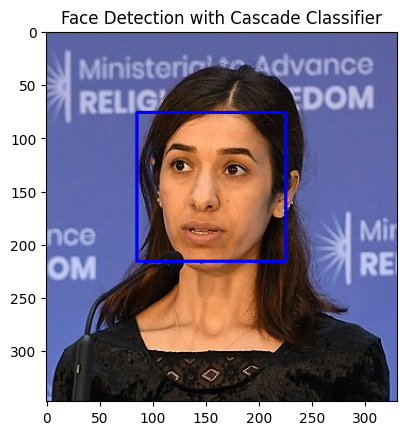

In [1]:
import cv2
import matplotlib.pyplot as plt

# بارگذاری تصویر
image = cv2.imread('Data/Nadia_Murad.jpg')

# بارگذاری مدل Cascade Classifier برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# تبدیل تصویر به grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# تشخیص چهره‌ها
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# رسم مستطیل دور چهره‌ها
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# نمایش تصویر
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Face Detection with Cascade Classifier")
plt.show()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر
image = cv2.imread('Data/Nadia_Murad.jpg')

# بارگذاری مدل DNN برای تشخیص چهره
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')

# تبدیل تصویر به فرمت مناسب برای ورودی مدل
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# انجام پیش‌بینی
net.setInput(blob)
detections = net.forward()

# پردازش نتایج و شناسایی ناحیه دماغ (تقریبی)
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        # تقریبی: رسم مستطیل دور دماغ (موقعیت تقریبی)
        nose_startX = startX + int((endX - startX) * 0.3)
        nose_endX = startX + int((endX - startX) * 0.7)
        nose_startY = startY + int((endY - startY) * 0.4)
        nose_endY = startY + int((endY - startY) * 0.6)
        
        # رسم مستطیل دور دماغ
        cv2.rectangle(image, (nose_startX, nose_startY), (nose_endX, nose_endY), (0, 255, 0), 2)

# نمایش تصویر
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Nose Detection with DNN")
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
nadia = cv2.imread('Data/Nadia_Murad.jpg',0)
denis = cv2.imread('Data/Denis_Mukwege.jpg')
solvay = cv2.imread('Data/Solvay.jpg')

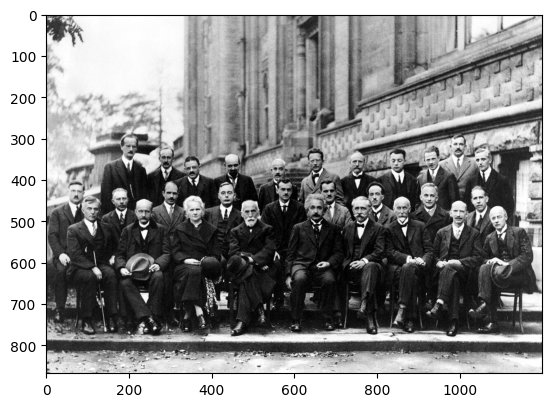

In [ ]:
plt.imshow(solvay,cmap='gray')

In [ ]:
face_cascale = cv2.CascadeClassifier('Data/haarcascade_frontalface_default.xml')

# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

In [ ]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascale.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (255,255,255),10)
        
        return face_img

In [ ]:
result = detect_face(solvay)

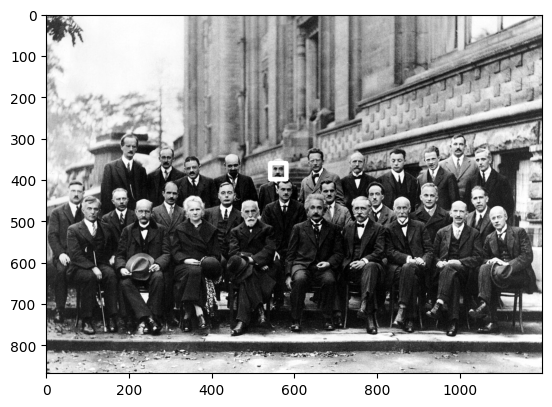

In [ ]:
plt.imshow(result,cmap='gray')

In [ ]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascale.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (255,255,255),10)
        
        return face_img



In [ ]:
result = adj_detect_face(solvay)

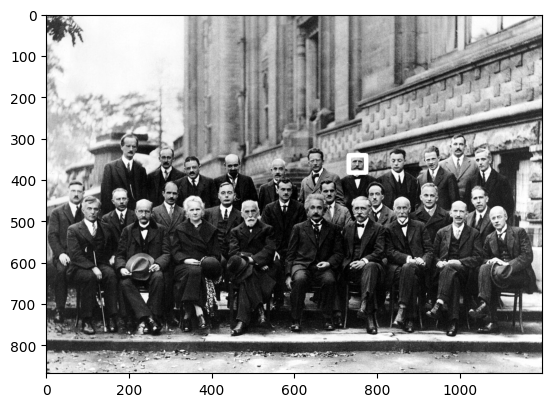

In [ ]:
plt.imshow(result,cmap='gray')

In [ ]:
eye_cascade = cv2.CascadeClassifier('Data/haarcascade_eye.xml')

In [ ]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (255,255,255),10)
        
        return face_img

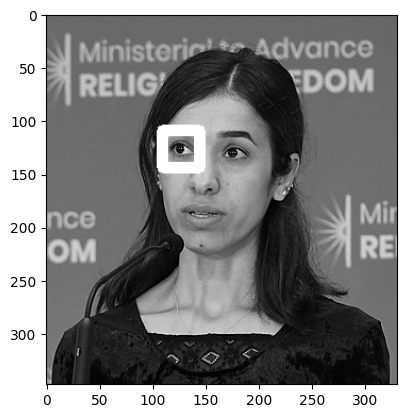

In [ ]:
result = detect_eyes(nadia)

plt.imshow(result,cmap='gray')

In [ ]:
# result = detect_eyes(denis)
# plt.imshow(result,cmap='gray')    # مشکلدارد  کلا کد من همه فایل 

# دماغ

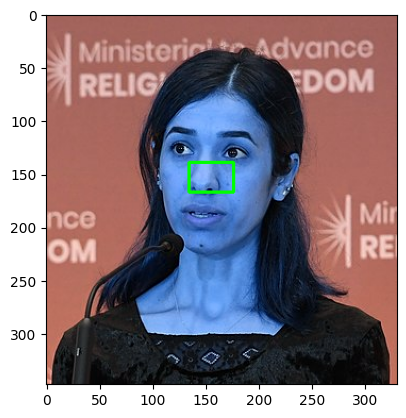

In [ ]:
import cv2
import numpy as np

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# بارگذاری تصویر
image = cv2.imread('Data/Nadia_Murad.jpg')

def detect_nose(img):
    face_img = img.copy()
    
    # تشخیص چهره‌ها
    faces = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # ناحیه چهره در تصویر
        roi_gray = face_img[y:y+h, x:x+w]
        
        # تقریبی: ناحیه دماغ
        nose_x = x + int(w * 0.35)
        nose_y = y + int(h * 0.45)
        nose_w = int(w * 0.3)
        nose_h = int(h * 0.2)
        
        # رسم مستطیل دور دماغ
        cv2.rectangle(face_img, (nose_x, nose_y), (nose_x + nose_w, nose_y + nose_h), (0, 255, 0), 2)
        
    return face_img

# اجرای تابع تشخیص دماغ
result_image = detect_nose(image)

plt.imshow(result_image)


# لب

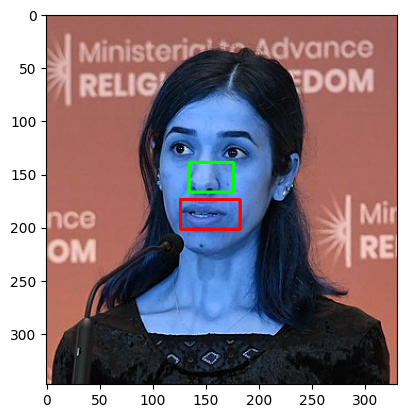

In [ ]:
import cv2
import numpy as np

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_lips(img):
    face_img = img.copy()
    
    # تشخیص چهره‌ها
    faces = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # ناحیه چهره در تصویر
        roi_gray = face_img[y:y+h, x:x+w]
        
        # تقریبی: ناحیه لب
        lip_x = x + int(w * 0.3)
        lip_y = y + int(h * 0.7)
        lip_w = int(w * 0.4)
        lip_h = int(h * 0.2)
        
        # رسم مستطیل دور لب
        cv2.rectangle(face_img, (lip_x, lip_y), (lip_x + lip_w, lip_y + lip_h), (255, 0, 0), 2)
        
    return face_img

# اجرای تابع تشخیص دماغ
result_image = detect_lips(result_image)

plt.imshow(result_image)


# گونه

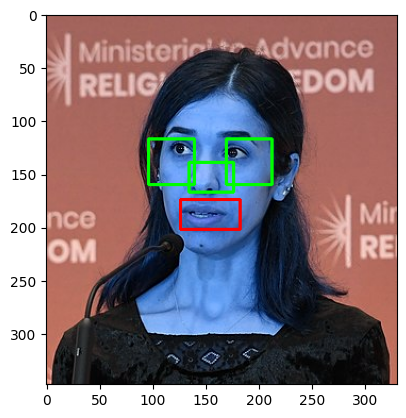

In [ ]:
import cv2
import numpy as np

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_cheeks(img):
    face_img = img.copy()
    
    # تشخیص چهره‌ها
    faces = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # ناحیه چهره در تصویر
        roi_gray = face_img[y:y+h, x:x+w]
        
        # تقریبی: ناحیه گونه‌ها
        left_cheek_x = x + int(w * 0.1)
        left_cheek_y = y + int(h * 0.3)
        left_cheek_w = int(w * 0.3)
        left_cheek_h = int(h * 0.3)
        
        right_cheek_x = x + int(w * 0.6)
        right_cheek_y = y + int(h * 0.3)
        right_cheek_w = int(w * 0.3)
        right_cheek_h = int(h * 0.3)
        
        # رسم مستطیل دور گونه‌ها
        cv2.rectangle(face_img, (left_cheek_x, left_cheek_y), (left_cheek_x + left_cheek_w, left_cheek_y + left_cheek_h), (0, 255, 0), 2)
        cv2.rectangle(face_img, (right_cheek_x, right_cheek_y), (right_cheek_x + right_cheek_w, right_cheek_y + right_cheek_h), (0, 255, 0), 2)
        
    return face_img


# اجرای تابع تشخیص دماغ
result_image = detect_cheeks(result_image)

plt.imshow(result_image)

# ابرو 

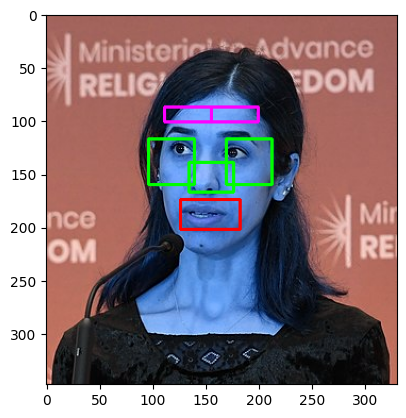

In [ ]:
import cv2
import numpy as np

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_eyebrows(img):
    face_img = img.copy()
    
    # تشخیص چهره‌ها
    faces = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # ناحیه چهره در تصویر
        roi_gray = face_img[y:y+h, x:x+w]
        
        # تقریبی: ناحیه ابروها
        left_eyebrow_x = x + int(w * 0.2)
        left_eyebrow_y = y + int(h * 0.1)
        left_eyebrow_w = int(w * 0.3)
        left_eyebrow_h = int(h * 0.1)
        
        right_eyebrow_x = x + int(w * 0.5)
        right_eyebrow_y = y + int(h * 0.1)
        right_eyebrow_w = int(w * 0.3)
        right_eyebrow_h = int(h * 0.1)
        
        # رسم مستطیل دور ابروها
        cv2.rectangle(face_img, (left_eyebrow_x, left_eyebrow_y), (left_eyebrow_x + left_eyebrow_w, left_eyebrow_y + left_eyebrow_h), (255, 0, 255), 2)
        cv2.rectangle(face_img, (right_eyebrow_x, right_eyebrow_y), (right_eyebrow_x + right_eyebrow_w, right_eyebrow_y + right_eyebrow_h), (255, 0, 255), 2)
        
    return face_img

result_image = detect_eyebrows(result_image)

plt.imshow(result_image)

# گوش

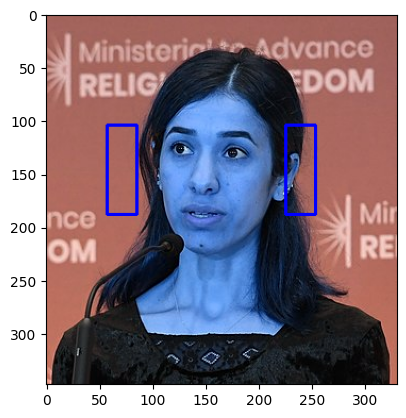

In [ ]:
import cv2
import numpy as np

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_ears(img):
    face_img = img.copy()
    
    # تشخیص چهره‌ها
    faces = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # ناحیه چهره در تصویر
        roi_gray = face_img[y:y+h, x:x+w]
        
        # تقریبی: ناحیه گوش‌ها
        left_ear_x = x - int(w * 0.2)
        left_ear_y = y + int(h * 0.2)
        left_ear_w = int(w * 0.2)
        left_ear_h = int(h * 0.6)
        
        right_ear_x = x + w
        right_ear_y = y + int(h * 0.2)
        right_ear_w = int(w * 0.2)
        right_ear_h = int(h * 0.6)
        
        # رسم مستطیل دور گوش‌ها
        cv2.rectangle(face_img, (left_ear_x, left_ear_y), (left_ear_x + left_ear_w, left_ear_y + left_ear_h), (0, 0, 255), 2)
        cv2.rectangle(face_img, (right_ear_x, right_ear_y), (right_ear_x + right_ear_w, right_ear_y + right_ear_h), (0, 0, 255), 2)
        
    return face_img

# تشخیص گوش‌ها
result_image = detect_ears(image)

plt.imshow(result_image)

In [1]:
import cv2

# بارگذاری مدل Haar Cascade برای تشخیص چهره
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("فریم نتوانست خوانده شود.")
        break
    
    # تشخیص چهره
    frame = detect_face(frame)
    
    # نمایش فریم
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == ord('q') or k == 27:  # کلید 'q' و کلید ESC برای خروج
        break

cap.release()
cv2.destroyAllWindows()